# What are the factors that affect US unemployment rate?

Question: What are the factors influence the unemployment rate? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [31]:
Econ = pd.read_csv("EconDATAYear.csv") #Unemployment Data
Tobacco = pd.read_csv("tobaccouse.csv") #Tobacco Usage Data 
Renewable = pd.read_csv("Renewableenergy.csv") #Renewable Energy Consumption
Education = pd.read_csv("total-government-expenditure-on-education-gdp.csv") #Total Government Expenditure on Education as a share of GDP.

In [32]:
#Unemployment data
Date = Econ.Date.to_numpy(dtype = np.int32)
Unemployrate = Econ.UNRATE.to_numpy(dtype = np.float64)

In [33]:
#Tobacco data
year = Tobacco.Year.to_numpy(dtype= np.int32)
Tobacco['Smoke everyday'] = Tobacco['Smoke everyday'].str.replace('%', '')
Tobacco['Smoke everyday'] = Tobacco['Smoke everyday'].astype(float).to_numpy(dtype=np.float64)
Tobacco['Former smoker'] = Tobacco['Former smoker'].str.replace('%', '')
Tobacco['Former smoker'] = Tobacco['Former smoker'].astype(float).to_numpy(dtype=np.float64)

In [16]:
#Renewable Energy Data
Year = Renewable["Annual Total"].to_numpy(dtype = np.int32)
energyconsumption = Renewable["Total Renewable Energy Consumption"].to_numpy(dtype = np.float64)

In [38]:
#Total Government Expenditure on Education as a share of GDP data
Eduyear = Education.Year.to_numpy(dtype= np.int32)
Spending = Education.EducationSpending.to_numpy(dtype=np.float64)
Spending = np.round(Spending, 2)

array([4.  , 5.5 , 6.09, 6.3 , 6.36, 6.33, 6.25, 6.17, 6.16, 6.24, 6.44,
       6.74, 6.69, 6.5 , 6.25, 6.23, 6.13, 4.95, 4.81, 5.12, 4.93, 4.99,
       5.44])

In [6]:
#Since the tobacco usage data is collected by 50 states in US from 1995 to 2011, I calculate the average tobacco consumption each year
#by take the sum of 50 states and divide by 50. 
average_smoking_rate = {}
# Calculate the rounded average smoking rate for each year from 1995 to 2010
for year in range(1995, 2011):
    sum_for_year = Tobacco.loc[Tobacco['Year'] == year, 'Smoke everyday'].sum()
    count_for_year = (Tobacco['Year'] == year).sum()
    if count_for_year != 0:
        average_smoking_rate[year] = round(sum_for_year / count_for_year, 2)
    else:
        average_smoking_rate[year] = 0
for year, rate in average_smoking_rate.items():
    print(f"Year {year}: {rate}")

Year 1995: 20.01
Year 1996: 19.63
Year 1997: 18.96
Year 1998: 18.49
Year 1999: 18.06
Year 2000: 17.56
Year 2001: 17.41
Year 2002: 18.04
Year 2003: 17.17
Year 2004: 15.65
Year 2005: 15.23
Year 2006: 14.79
Year 2007: 14.74
Year 2008: 13.77
Year 2009: 13.15
Year 2010: 12.86


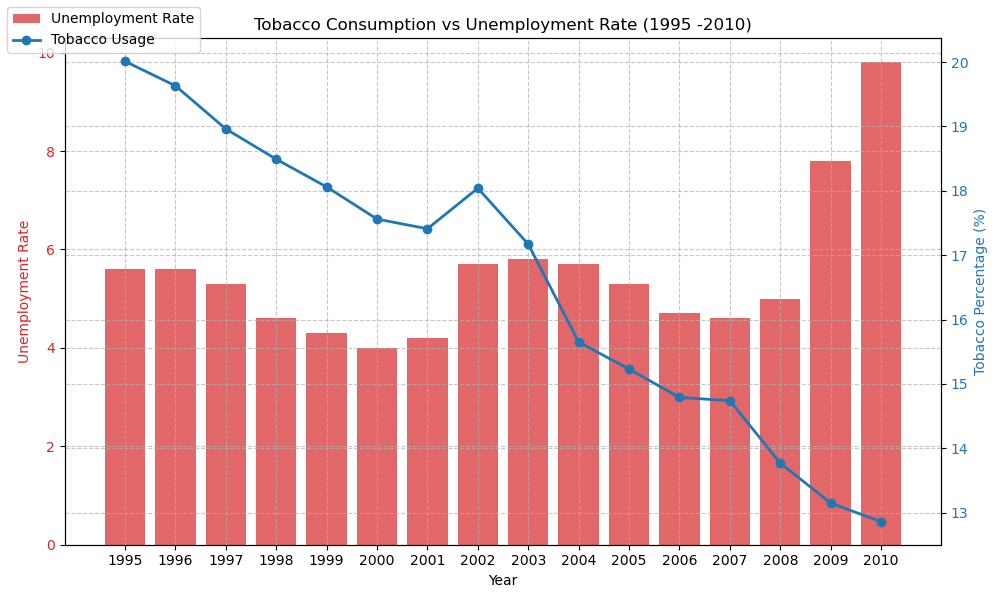

In [7]:
#Plotting graph of Unemployment Rate and Tobacco Consumption. 
years = list(average_smoking_rate.keys())
smoking_rates = list(average_smoking_rate.values())
econ_data_filtered = Econ[(Econ['Date'] >= 1995) & (Econ['Date'] <= 2010)]
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plotting
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(years, smoking_rates, marker='o', color=color, label='Tobacco Usage', linewidth=2)
ax2.set_ylabel('Tobacco Percentage (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
# Plotting unemployment rate as a bar chart
color = 'tab:red'
ax1.bar(econ_data_filtered['Date'], econ_data_filtered['UNRATE'], color=color, alpha=0.7, label='Unemployment Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)
# Adding labels and title
plt.title('Tobacco Consumption vs Unemployment Rate (1995 -2010)')
plt.grid(True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.xticks(years)
fig.legend(loc='upper left')
plt.show()

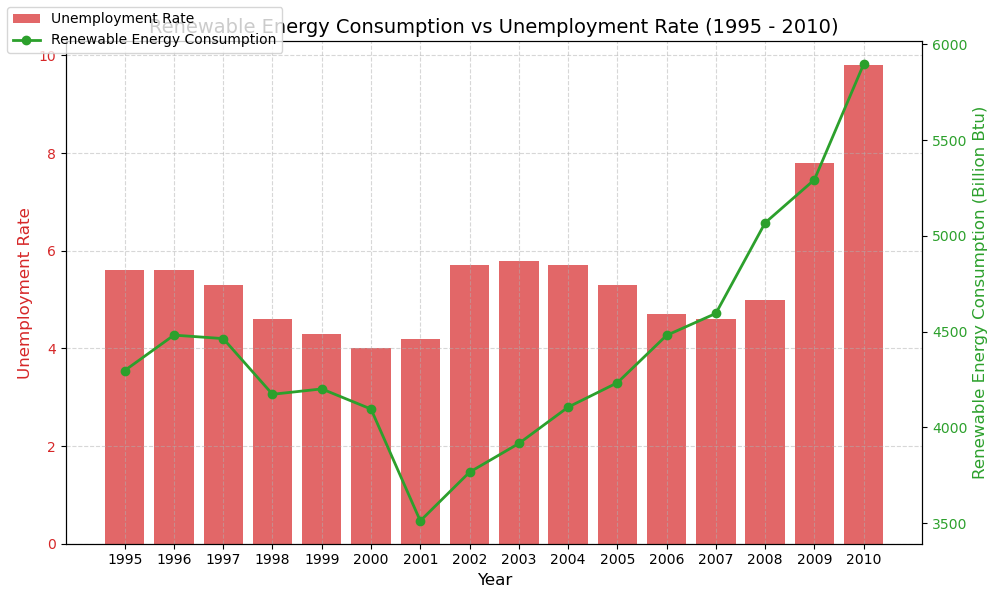

In [28]:
#Plotting Unemployment rate and renewable energy consumption 
fig, ax1 = plt.subplots(figsize=(10, 6))
#Plotting renewable energy consumption
color_renewable = 'tab:green'
ax2 = ax1.twinx()
ax2.plot(years, energyconsumption, marker='o', color=color_renewable, label='Renewable Energy Consumption', linewidth=2)
ax2.set_ylabel('Renewable Energy Consumption (Billion Btu)', color=color_renewable, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_renewable)
# Plotting unemployment rate as a bar chart
color_unemployment = 'tab:red'
ax1.bar(Date, Unemployrate, color=color_unemployment, alpha=0.7, label='Unemployment Rate')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Unemployment Rate', color=color_unemployment, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_unemployment)
ax1.grid(True, linestyle='--', alpha=0.5)
plt.title('Renewable Energy Consumption vs Unemployment Rate (1995 - 2010)', fontsize=14)
fig.tight_layout()
plt.xticks(years)
fig.legend(loc='upper left', fontsize=10)
plt.show()


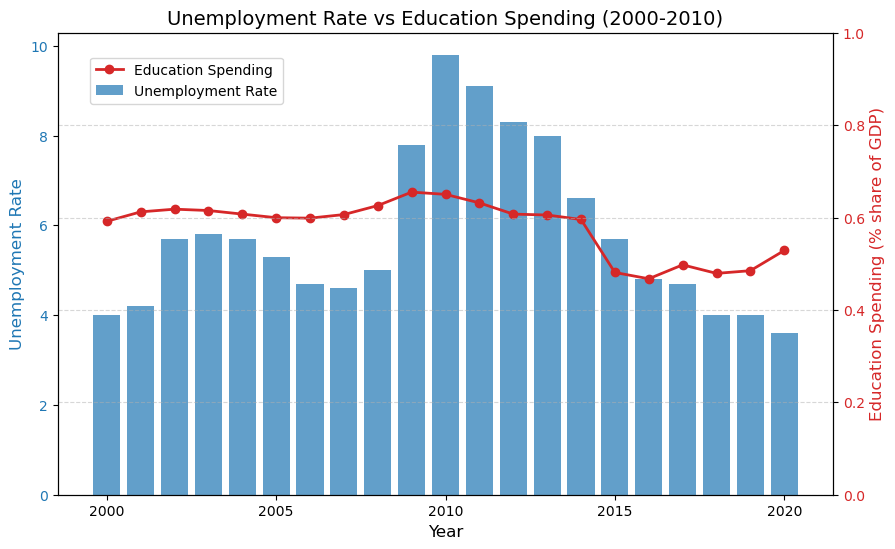

In [46]:
#Plotting Unemployment Rate and Education Spending
# Filter data for the years 2000-2010
mask_unemployment = (Date >= 2000) & (Date <= 2020)
mask_spending = (Eduyear >= 2000) & (Eduyear <= 2020)
Date_filtered = Date[mask_unemployment]
Unemployrate_filtered = Unemployrate[mask_unemployment]
Eduyear_filtered = Eduyear[mask_spending]
Spending_filtered = Spending[mask_spending]
fig, ax1 = plt.subplots(figsize=(10, 6))
color_unemployment = 'tab:blue'
ax1.bar(Date_filtered, Unemployrate_filtered, color=color_unemployment, alpha=0.7, label='Unemployment Rate')
color_spending = 'tab:red'
ax1.plot(Eduyear_filtered, Spending_filtered, marker='o', color=color_spending, label='Education Spending', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Unemployment Rate', color=color_unemployment, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_unemployment)
ax2 = ax1.twinx()
ax2.set_ylabel('Education Spending (% share of GDP)', color=color_spending, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_spending)
plt.title('Unemployment Rate vs Education Spending (2000-2010)', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.15,0.85))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
